In [1]:
import sqlite3

# Create SQLite connection (in-memory OR file-based if saving later)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create the sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price INTEGER
)
''')

# Insert sample data
data = [
    ("Smartwatch", 2, 5000),
    ("Headphones", 3, 3000),
    ("Hoodie", 5, 1200),
    ("Sneakers", 4, 2500),
    ("Smartwatch", 1, 5000),
    ("Hoodie", 2, 1200),
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", data)
conn.commit()


In [2]:
import sqlite3
import pandas as pd

# Reconnect to DB
conn = sqlite3.connect("sales_data.db")

# SQL query
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Load into DataFrame
df = pd.read_sql_query(query, conn)
print(df)

conn.close()


      product  total_qty  revenue
0  Headphones          3     9000
1      Hoodie          7     8400
2  Smartwatch          3    15000
3    Sneakers          4    10000


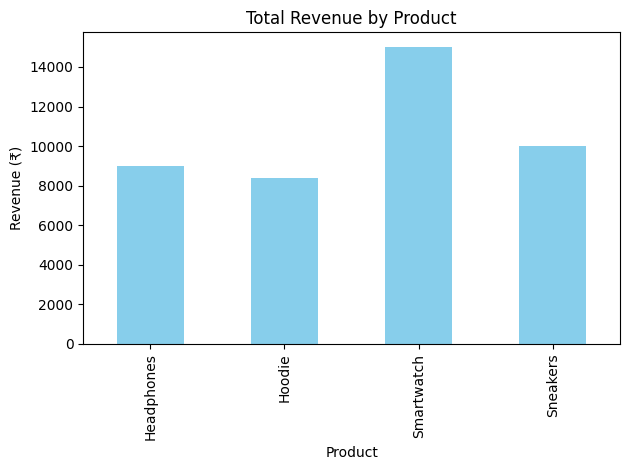

In [3]:
import matplotlib.pyplot as plt

# Bar chart
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Total Revenue by Product")
plt.ylabel("Revenue (₹)")
plt.xlabel("Product")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()
